# Tutorial avanzado de Manim CE: La aplicación de Henón (o mapa de Henón)

En este cuaderno os voy a enseñar a usar Manim para explicar y animar qué es el mapa de Henón.  
Dividiré el cuaderno en los siguientes contenidos:

1. Qué es el mapa de Henón.
2. Cómo dibujar en Manim el mapa de Henón.
3. Como animar transformaciones del mapa en Manim.
4. Uso de los updaters para animar la variación de un parámetro del del mapa.
5. Representación en 3D del mapa en función del parámetro.
6. Resumen de lo aprendido y conclusiones

Para seguir este notebook no es esencial tener ningún conocimiento específico previo, pero es muy recomendable:
* Saber programación en Python o tener algunas nociones previas de su sintaxis.
* Conocer superficialmente el funcionamiento de Manim (tengo un tutorial previo de los conceptos básicos).
* Saber un poco de mátemáticas. Aunque explicaremos justo a continuación qué es el Mapa de Henón, será más facil de seguir si se tienen conceptos básicos en la cabeza.
  
No obstante, ninguno de estos requisitos es fundamental. Simplemente son recomendables. Dicho esto, empezemos explicando qué queremos hacer en este cuaderno

## 1. Qué es el mapa de Henón
Un sistema dinámico es cualquier cosa que cambia con el tiempo. Por ejemplo:
  
* El clima.
* La trayectoria de un balón que lanzas al aire.
* Cómo crecen los ingresos de una empresa.
  
El Mapa de Henón es un sistema dinámico muy sencillo que presenta comportamientos muy interesantes. Su expresión matemática es la siguiente:  
   ![Ecuación del Mapa de Henón](https://wikimedia.org/api/rest_v1/media/math/render/svg/87672565712868250e7d2b410307bb1b047f31a7)  
Esto quiere decir que comienzas cogiendo un par de números x_n e y_n, y para un a y b concretos (suele considerarse que a=1.4 y b=0.3) se pueden obtener un par de números x_{n+1} e y_{n+1} siguiendo esa fórmula. Despues con ese par de números se puede repetir el proceso tantas veces como se quiera para obtener tantos puntos como se quiera. A continuación os pongo un dibujo de cómo se ve este mapa para los a=1.4 y b=0.3:
![Mapa de Henón](https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/HenonMapImage.png/800px-HenonMapImage.png)  
Lo que aquí vemos son los puntos en el espacio que salen al aplicarle a un punto inicial muchísimas veces el mapa de Henón, representando los puntos en el plano XY. Lo interesante de este mapa es que para valores algunos valores de a, se dibuja este "bumerán" tan interesante, y la aparición de este patrón nos dice que este mapa tiene comportamiento caótico, algo que a los matemáticos y físicos les interesa mucho. Sin entrar en detalles, diremos que el caos en este sistema es cuando el mapa de Henón presenta muchos puntos distintos que no siguen ningún patrón aparente.

Si aún no habéis entendido del todo lo que es el mapa de Henón, quedaos con estos conceptos, y ahora cuando nos pongamos a programar, veréis como se entiende mejor

*Nota: En realidad la forma más rigurosa de referirnos al mapa de Henón es como la **Aplicación** de Henón, pero al buscar más información por internet es más usual llamarlo Mapa de Henón, aunque no sea su nombre más adecuado. El error viene de traducir directamente del ingles "Henon Map", y en inglés mapa significa aplicación en el contexto matemático. No es el objetivo de este cuaderno explicar la diferencia entre estos dos términos, pero lo dejo anotado por si acaso y recalco que la forma más correcta de llamarlo es Aplicación de Henón*

## 2. Cómo dibujar en Manim el mapa de Henón.
En esta sección vamos a dibujar el mapa de Henón tal y como vimos en la imagen de la sección anterior con Manim.  
Comenzamos importando las librerías (Recalco que es importante ir ejecutando las celdas en orden para evitar problemas de funciones y librerías):

In [2]:
import numpy as np
from manim import *
#from MF_Tools import *

`MF_Tools` es un plugin con añadidos muy interesantes a Manim. Os dejo [aqui](https://github.com/TheMathematicFanatic/MF_Tools) un enlace al Github en el que explica como usar su herramienta y al [video de Youtube](https://youtu.be/IbVymn040T4) en el que descubrí esta herramienta. En este cuaderno no la usaré porque no quiero complicar demasiado las cosas, pero dejo anotado que este plugin es muy útil para hacer cosas más avanzadas con ecuaciones y por los atajos de escritura que introduce.  
Ahora vamos crear una función en Python que nos genere los puntos del mapa de Henón, y después la aplicaremos en nuestro código para representar los puntos en Manim:

Manim Community v0.18.1

[01/14/25 16:51:55] INFO                                                                   ]8;id=832727;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=180073;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/im                         
                             ages/manim_ce/Henon_map_image_ManimCE_v0.18.1.png'                                    
                                                                                                                   

                    INFO     Rendered Henon_map_image                                                  ]8;id=819010;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=644012;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 0 animations                                                                   

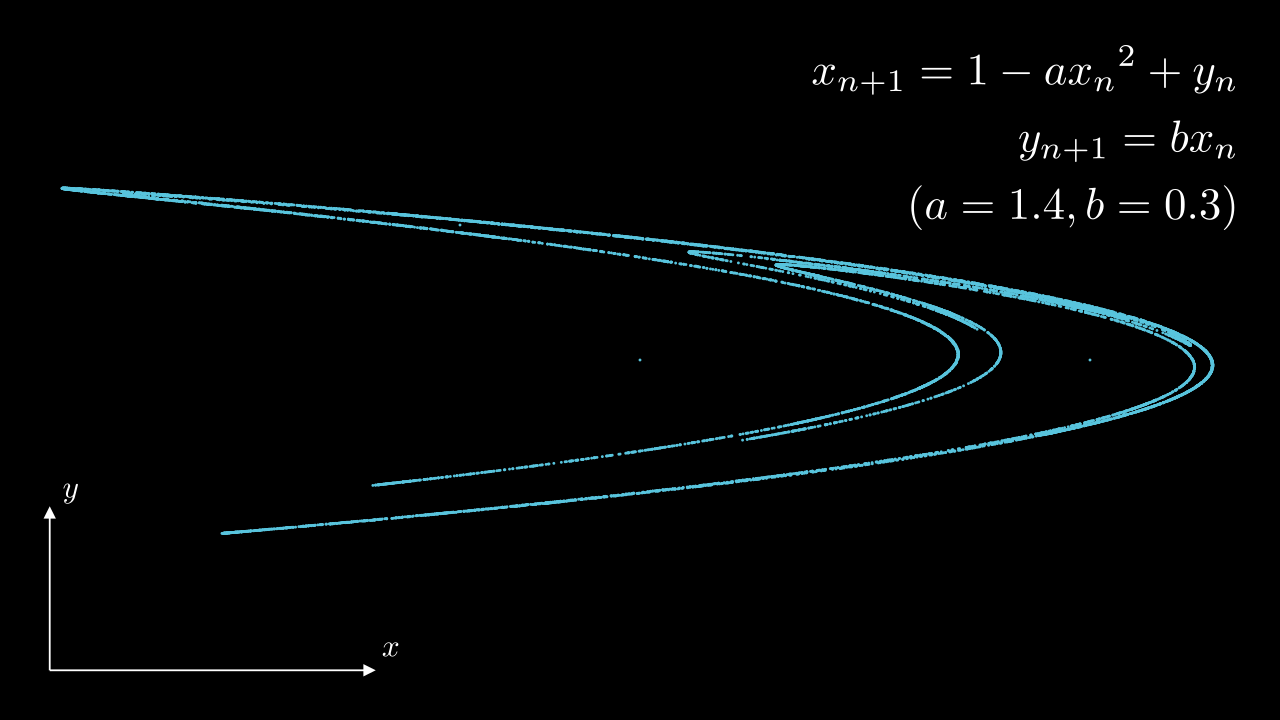

In [3]:
%%manim -qm -vINFO --disable_caching Henon_map_image

def HenonMap(a: float= 1.4, b: float= 0.3, N: int= 10000, zoom: float= 5.):
    x, y = 0, 0 #Escogemos unos puntos iniciales
    X, Y= [x], [y] #Los añadimos a las listas en las que meteremos los puntos que generaremos
    for i in range(N):
        #Aplicamos la fórmula del mapa de Henón a los puntos
        x_new= 1 - a*x**2 + y
        y_new= b*x
        #Los añadimos a las listas que hemos generado
        X.append(zoom*x_new)
        Y.append(zoom*y_new)
        #Redefinimos los puntos para que en la próxima iteración se usen esos puntos
        x, y = x_new, y_new
    return X, Y

#Creamos la escena de Manim
class Henon_map_image(Scene):
    def construct(self):
        #Sacamos los puntos y creamos un grupo para generar los puntos que Manim puede manejar
        X, Y= HenonMap()
        points=VGroup()
        for x, y in zip(X, Y): #zip es un iterador de Python que coje por parejas los valores al almacenados en X e Y y los llama x e y en cada vuelta
            points.add(Dot([x, y, 0], color=BLUE).scale(0.2)) #Añade los puntos al grupo
        self.add(points) #Añade el grupo de puntos a la escena

        Map_equation = MathTex(r'x_{n+1} = 1 - a {x_n}^2 + y_n \\ y_{n+1}= bx_n  \\ (a=1.4, b=0.3)').to_corner(UR)
        self.add(Map_equation) #Añadimos la ecuación, escrita en latex, a la imagen

        ax= Axes(tips=True,  x_range=[0, 1, 1],  y_range=[0, 1, 1]).scale(0.3).to_corner(DL)
        labels = ax.get_axis_labels(
            MathTex("x").scale(0.7), MathTex("y").scale(0.7))
        self.add(ax, labels)#Añadimos aquí un par de ejes cartesianos para desaltar el sentido de las variables en la imagen

Como vemos, se obtiene el mismo mapa que en la imagen vista antes. Ahora vamos a hacer alguna sencilla animación sobre este mapa. Pero antes, vamos a hacer algunos comentarios sobre el código:
Toda la documentación de Manim la podéis encontrar [aquí](https://docs.manim.community/en/stable/index.html). Para las dudas en lo referido a esta escena os voy a dejar indicados todos los Mobjects y escenas que he usado, y así podréis ver que es lo que hacen. Además tenéis enlaces a la documentación de Manim particular de cada uno, por si tenéis curiosidad de ver todo lo que la librería os puede ofrecer:
* [VGroups](https://docs.manim.community/en/stable/reference/manim.mobject.types.vectorized_mobject.VGroup.html): Son conjuntos de VMobjects (Vectorized Mobjects) a los que les podremos aplicar todos los métodos y propiedades de los VMobjects. La diferencia entre un Mobject y un VMobject es que los primeros son más generales, puediendo ser fotos, textos, etc... Mientras que los segundos son una subclase de los primeros enfocadas a trabajar con conjuntos de puntos y vectores. Al ser este el caso, usaremos un VGroup. Al final de este cuaderno, al trabajar con puntos sueltos, tendremos un ejemplo en el que solo podremos usar un Group.
* [Dot](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.arc.Dot.html#dot): Puntos individuales. Como se puede ver en la guía son un tipo de círculos de radio muy pequeño, por lo que tienen muchos de los métodos y atributos de geometría.
* [Scene](https://docs.manim.community/en/stable/reference/manim.scene.scene.Scene.html#manim.scene.scene.Scene): Cuando hacemos `self.add` o `self.play`, ese `self` es la escena en la que estamos trabajando
* [MathTex](https://docs.manim.community/en/stable/reference/manim.mobject.text.tex_mobject.MathTex.html#mathtex): Textos matemáticos en LaTeX. Cuanto más manejo tengas de este formato para escribir fórmulas matemáticas, más comodo será usar este tipo de Mobject. Es relativamente intuitivo y estándar en muchas ramas de la ciencia.
* [Axes](https://docs.manim.community/en/stable/reference/manim.mobject.graphing.coordinate_systems.Axes.html#axes): Ejes de coordenadas. Podéis ver como más adelante, los ejes de estos sistemas de coordenadas se definen con un método de esta clase.  

Detalles más finos como los métodos `to_corner()` o `scale()`, que he usado en esta escena, son bastante autoexplicativos y es muy recomendable ir a la documentación a explorar todas los métodos de los [Mobjects](https://docs.manim.community/en/stable/reference/manim.mobject.mobject.Mobject.html) o [VMobjects](https://docs.manim.community/en/stable/reference/manim.mobject.types.vectorized_mobject.VMobject.html#vmobject) y las cosas que pueden hacer con los objetos con los que se trabaja. Remarco que estas dos clases son básicas en Manim, y muchos de los métodos que se usan todo el rato para la mayoría de los objetos están ahí referenciados (y fijaos que VMobject hereda de Mobject, por lo que sus métodos y atributos también se pueden usar en el pero no al revés)

## 3. Transformación de un Mapa de Henón
Vamos a hacer una ligera modificación del código que hemos visto para poder aplicarle una trasnformación. Dejaremos intecta la creación del mapa que hicimos antes, después crearemos un segundo mapa y usaremos la animación `Transform` para poder animar la transformación. Añadiremos texto que se transforme también con el valor del parámetro

In [3]:
%%manim -qm -vINFO --disable_caching Henon_map_transformation

#Creamos la escena de Manim
class Henon_map_transformation(Scene):
    def construct(self):
        ### El mismo código en la sección anterior ###
        X, Y= HenonMap()
        points=VGroup()
        for x, y in zip(X, Y): 
            points.add(Dot([x, y, 0], color=BLUE).scale(0.2)) 
        ###############################################
        a1_4=MathTex('a=1.', '4').scale(2).to_corner(UR)
        self.play(Create(points), Write(a1_4)) #Creamos los puntos y el texto
        self.wait(3) #Espera 3 segundos
        
        X2, Y2= HenonMap(a=1.2) #Repetimos la misma estructura de código con un mapa con un parámetro a distinto
        points2=VGroup()
        for x, y in zip(X2, Y2): 
            points2.add(Dot([x, y, 0], color=RED).scale(0.2))
        
        a1_2=MathTex('a=1.', '2').scale(2).to_corner(UR)
        self.play(Transform(points, points2), Transform(a1_4, a1_2)) #Transformamos un mapa en otro y las ecuaciones con él
        self.wait() #Esperamos 2 segundos
        

Manim Community v0.18.1

[01/13/25 18:35:29] INFO     Caching disabled.                                                 ]8;id=143657;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=34574;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\

[01/13/25 18:36:07] INFO     Animation 0 : Partial movie file written in                   ]8;id=798659;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=35410;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/partial_movie_files/Henon_map_transforma                         
                             tion/uncached_00000.mp4'                                                              

                    INFO     Caching disabled.                                                 ]8;id=36830;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=360549;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\

[01/13/25 18:36:08] INFO     Animation 1 : Partial movie file written in                   ]8;id=36389;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=768552;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/partial_movie_files/Henon_map_transforma                         
                             tion/uncached_00001.mp4'                                                              

[01/13/25 18:36:14] INFO     Caching disabled.                                                 ]8;id=159863;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=44566;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\

[01/13/25 18:36:54] INFO     Animation 2 : Partial movie file written in                   ]8;id=146453;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=422609;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/partial_movie_files/Henon_map_transforma                         
                             tion/uncached_00002.mp4'                                                              

                    INFO     Caching disabled.                                                 ]8;id=379477;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=812974;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\

[01/13/25 18:36:55] INFO     Animation 3 : Partial movie file written in                   ]8;id=106654;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=919999;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/partial_movie_files/Henon_map_transforma                         
                             tion/uncached_00003.mp4'                                                              

                    INFO     Combining to Movie file.                                      ]8;id=353919;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=452561;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=48163;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=449314;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/Henon_map_transformation.mp4'                                    
                                                                                                                   

                    INFO     Rendered Henon_map_transformation                                         ]8;id=422540;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=138877;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 4 animations                                                                   

Como vemos, este código es muy parecido al que usamos en la sección anterior, y en él básicamente se crean dos mapas con un valor distinto de "a" y usando la animación `Transform`, podemos convertir un mapa en otro sin mayores complicaciones, con una animación muy vistosa.  
Ahora bien. Si quisiéramos ver cómo cambia el mapa cambia al variar el parámetro de una forma mucho más limpia, sería bastante engorroso tenr que crear todos los mapas e ir usando `Transform` en cada caso ¿Hay alguna forma más práctica de animar la variación del mapa a medida que variamos "a"? La respuesta es que sí, pero para poder usarla, nos hace falta introducir un concepto muy importante de manim: Los updaters

## 4. Uso de un updater para animar la transformación del mapa
Vamos a explicar como usar los updaters en Manim para poder ver cómo el mapa de Henón varía a medida que el parámetro "a" va cambiando de valor  
Para ello, lo primero es definir qué es un updater. Un updater es una función que se aplica a un objeto en cada fotograma durante una animación. En nuestro caso, estaremos interesados en variar el parámetro "a" durante una parte del vídeo. Con un tipo de variable llamada `ValueTracker`, obtendremos el valor de "a" en cada frame de la animación, y se lo pasaremos al updater para modificar el mapa (nuestro objeto en este caso) en consecuencia. En el código podréis ver cómo se crean y interactúan con los elementos de la escena:

In [4]:
%%manim -qm -vINFO --disable_caching Henon_map_updater

#Creamos la escena de Manim
class Henon_map_updater(Scene):
    def construct(self):
        
        a=ValueTracker(0) #Al animar el cambio de esta variable, haremos que distintos objetos cambien sus propiedades y se reflejen en la animación
        aequal=MathTex('a = ').to_edge(UL)
        a_dec = DecimalNumber(a.get_value()).next_to(aequal, RIGHT)
        
        #Esto es un updater sencillo, que coge el valor "a", se lo asigna al numero que ponemosen pantalla y siempre lo deja cerca de la ecuación "a="
        a_dec.add_updater(lambda a_dec: a_dec.set_value(a.get_value()).next_to(aequal, RIGHT))
        
        self.play(Write(aequal), Write(a_dec))
        #Creamos un gradiente de color que nos vaya variando el color a lo largo de la animación
        colors=color_gradient([WHITE, BLUE, PURPLE, ORANGE, RED, GREEN, YELLOW], 1000)
        
        #Esto es un updater mas complejo, una función que cambiara al mapa.
        def update_function(mapa):
            X, Y= HenonMap(a= a.get_value(), N=1000, zoom=4) #Calculamos los puntos del mapa
            new_mapa=VGroup()
            color=colors[int(a.get_value()*705)]#EL 705 de esta linea es porque 705*1.41~1000, por lo que usamos todos los colores que creamos
                                                #Un poco chapuza (ya si cambiasemos el tamaño del gradiente o el valor máximo de a, dejaría de funcionar)
            for x, y in zip(X, Y):
                new_mapa.add(Dot([x, y, 0], color=color).scale(0.2))
            mapa.become(new_mapa)
        
        X, Y= HenonMap(a=a.get_value(), N=1000, zoom=4)
        mapa=VGroup()
        for x, y in zip(X, Y): 
            mapa.add(Dot([x, y, 0], color=WHITE).scale(0.2))
        
        mapa.add_updater(update_function) #Aqui añadimos ese updater al mapa que vamos a poner en la escena

        self.play(Create(mapa))

        Map_equation = MathTex(r'x_{n+1} = 1 - a {x_n}^2 + y_n \\ y_{n+1}= 0.3 x_n').to_corner(UR)
        self.play(Write(Map_equation)) #Añades a ecuación, escrita en latex, a la imagen
        
        self.wait()
        self.play(a.animate.set_value(1.41), run_time=20, rate_func=linear) #Animamos el cambio del ValueTracker
        #Como hemos definido los updaters según el valor que vaya tomando el parámetro, esos updater actualizarán el aspecto del mapa y del valor de "a"
        self.wait()

Manim Community v0.18.1

[01/13/25 18:37:16] INFO     Caching disabled.                                                 ]8;id=110996;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=701519;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\

                    INFO     Animation 0 : Partial movie file written in                   ]8;id=881851;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=893768;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/partial_movie_files/Henon_map_updater/un                         
                             cached_00000.mp4'                                                                     

[01/13/25 18:37:17] INFO     Caching disabled.                                                 ]8;id=312963;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=624465;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\

[01/13/25 18:37:35] INFO     Animation 1 : Partial movie file written in                   ]8;id=123206;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=536052;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/partial_movie_files/Henon_map_updater/un                         
                             cached_00001.mp4'                                                                     

                    INFO     Caching disabled.                                                 ]8;id=322866;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=693429;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\

[01/13/25 18:38:08] INFO     Animation 2 : Partial movie file written in                   ]8;id=307243;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=960587;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/partial_movie_files/Henon_map_updater/un                         
                             cached_00002.mp4'                                                                     

                    INFO     Caching disabled.                                                 ]8;id=529865;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=644856;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\

                    INFO     Animation 3 : Partial movie file written in                   ]8;id=567046;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=970823;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/partial_movie_files/Henon_map_updater/un                         
                             cached_00003.mp4'                                                                     

                    INFO     Caching disabled.                                                 ]8;id=481207;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=208011;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\

[01/13/25 18:43:29] INFO     Animation 4 : Partial movie file written in                   ]8;id=191391;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=684132;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/partial_movie_files/Henon_map_updater/un                         
                             cached_00004.mp4'                                                                     

                    INFO     Caching disabled.                                                 ]8;id=796442;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=536446;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/renderer/cairo_renderer.py#78\78]8;;\

[01/13/25 18:43:30] INFO     Animation 5 : Partial movie file written in                   ]8;id=10244;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=158618;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/partial_movie_files/Henon_map_updater/un                         
                             cached_00005.mp4'                                                                     

                    INFO     Combining to Movie file.                                      ]8;id=144001;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=510809;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=580117;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=201814;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/720p30/Henon_map_updater.mp4'                                           
                                                                                                                   

                    INFO     Rendered Henon_map_updater                                                ]8;id=999255;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=341372;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 6 animations                                                                   

Como hemos visto en la animación, el Mapa de Henón tiene un comportamiento muy interesante, que puede cambiar de manera drástica según los valores de sus parámetros. Esta transformación gradual, desde un comportamiento predecible y ordenado hasta uno caótico, se conoce como la transición al caos. La transición al caos es el proceso mediante el cual un sistema dinámico que inicialmente muestra un comportamiento regular y predecible comienza a mostrar un comportamiento impredecible y altamente sensible a las condiciones iniciales.
Para acabar, podemos poner cada uno de estos dibujos apilados uno encima de otro, creando lo que se conoce como un "diagrama de bifurcación". En el representamos en los ejes de abajo a x e y, mientras que en la tercera dimensión representaremos el valor de "a". Así podremos ver cómo el sistema pasa de tener solo un punto fijo que se mueve, aparecen 2 en torno a a=0.35, 4 en 0.95, y eventualmente al caos.

## 5. Animación del Mapa de Henón en 3D
En esta parte del final, habrá que cambiar el tipo de escena a una escena en 3D, en la que el eje z será el valor de a (le restaremos 0.5 para que se vea mejor toda la animación sin que se pierda la idea del diagrama). Además, para no sobrecargar la escena usaremos el MObject `Point` en vez de `Dot`. Esto nos obliga a hacer un cambio pequeño de usar Groups en vez de VGroups, pero en este caso particular no es muy relevante (aunque en otro tipo de animaciones este tipo de cambios pueden ser cruciales)  


In [4]:
%%manim -qm -vERROR --disable_caching Henon_map3D
#El cambio de la flag de -vINFO a -vERROR es para evitar que al ejecutar el archivo salga un print enorme 
class Henon_map3D(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=75 * DEGREES, theta=-45 * DEGREES, zoom=2)
        #puntos=Group()
        A= np.arange(0.1, 1.4, 0.01) #Ojo, cuanto mayor sea este vector, mas tardará en animarse. Mucho cuidado!!
        colors=color_gradient([WHITE, BLUE, PURPLE, ORANGE, RED, GREEN, YELLOW], len(A))

        self.begin_ambient_camera_rotation(rate=0.1) #Hacemos que la cámara rote un poco
        
        for i, a in enumerate(A):
            puntos=Group()
            X, Y= HenonMap(a=a, N=500, zoom=2)
             #Aqui cojemos solo los últimos 30 valores para no sobrecargar la escena y que tarde menos.
            for x, y in zip(X[-30:], Y[-30:]): #Además hay que quitar muchos puntos para no ver la transición hasta los puntos fijos
                puntos.add(Point([x, y, a-0.5], color=colors[i], stroke_width=2)) #Fijaos en que restamos 0.5 al valor de a, como comenté previamente
            self.add(puntos)
            self.wait(0.05)# Hace falta poner un tiempo bajo para poder ver crear la ilusión de que las ramas van creciendo de formaa fluida
        self.wait(4) # Este tiempo de espera afecta al tiempo que tarda en crearse la escena, al seguir la cámara girando
        self.stop_ambient_camera_rotation()
        self.wait() 
        #Enfocamos el diagrama de bifurcaciones desde varias perspectivas
        self.move_camera(phi=75 * DEGREES, theta=120 * DEGREES, zoom=2.8, run_time=3)
        self.wait()
        self.move_camera(phi=0 * DEGREES, theta=0 * DEGREES, gamma=90*DEGREES, zoom=2, run_time=3)
        self.wait()
        self.move_camera(phi=-90* DEGREES, theta=0 * DEGREES, gamma=90*DEGREES, zoom=2, run_time=2)
        self.wait()
        self.move_camera(phi=-90* DEGREES, theta=90 * DEGREES, gamma=180*DEGREES, zoom=2, run_time=2)
        self.wait(4)

Manim Community v0.18.1

Una posible optimización a este código es escoger solo los elementos únicos de cada conjunto de los últimos 30 puntos que estamos representando. Esto nos permitiría representar más puntos en cada capa o barrer con mas valores el parámetro a. Pero eso complicaría un pelín el código al tener que cambiar la función HenonMap que definimos al principio (os lo dejo como reto!!)  
Para este tipo de escenas es recomendable, al igual que en la anterior, usar updaters, que cojan un mapa ya existente, y lo coloquen en la altura correspondiente en el eje Z. No obstante, ese ejercicio lo dejaré como reto, y aprovecho esta ocasión para enseñaros otra forma mas "chapucera" pero iguamente válida a nivel de código de hacer las cosas: Con un bucle y usando el método de la escena `self.add()`.  
Pista: En este caso, habría que aplicar el updater a la escena, y usar el método `scene.add(puntos_del_mapa)`, en vez de hacer que el mapa se convierta en el otro con `mapa.become(mapa_nuevo)`.

## 6. Conclusiones  
A modo de conclusiones, voy a apuntar brevemente todos los conceptos e ideas que podemos sacar en claro de los ejemplos que he presentado en este Notebook  
## Repaso de conceptos básicos de Manim
Durante todos los ejemplos, nos hemos familiarizado con los MObjects más usuales (`Dot`, `MathTex`, `Axes`, etc..) y con los métodos que estos tienen y cómo usarlos. Pero lo más importante es que en caso de que tengáis alguna idea o concepto que queráis animar,  ir a [la documentación de Manim](https://docs.manim.community/en/stable/), buscar los Mobjects quye te interesa representar y ver sus métodos o atributos y cómo usarlos, es siempre el pirmer paso.
### Como hacer imágenes estáticas con Manim  
Como hemos visto, si no ponemos ninguna animación y simplemente añandimos los MObjects que creemos con `self.add(MObject)`, se pueden crear imágenes fijas. Podéis ir a la [documentación de la clase `Scene`](https://docs.manim.community/en/stable/reference/manim.scene.scene.Scene.html#scene) y cotillear que otros métodos tiene además de `add`, `wait` o `play`, y así ver qué otros usos se os ocurren.
### Hacer animaciones sencillas
Dentro de `self.play()` hay que poner [animaciones](https://docs.manim.community/en/stable/reference_index/animations.html) o algún Mobject con el método `animate` y el método que quieras animar (por ejemplo `Punto=Dot; self.play(Punto.animate.scale(2).to_edge(UP))` hará que un punto dupliuque el tamaño y se mueva hasta el eje superior si lo habéis añadido antes con `self.add(Punto)` o con `self.play(Create(Punto))`, o alguna [animación de creación](https://docs.manim.community/en/stable/reference/manim.animation.creation.html#module-manim.animation.creation) parecida).  
Lo importante es que el potencial que dan las herramienta que Manim ofrece ya es enorme de por sí si las conoces lo suficiente, por lo que os animo a que exploréis Mobjects o métodos más complejos y cómo pueden automatizar mucho el trabajo (ejemplos rápidos podrían ser `StreamLines`, `Graph`, o `CoordinateSystem`).
### Los updaters
Los updaters, como hemos visto, permiten actualizar en cada frame los Mobjects aplicándoles las funciones que nosotros queramos. Esto acaba de exprimir todo el potencial de Manim. Se pueden definir mediante las funciones `lambda`, que para animaciones sencillas son ideales, y con funciones más complejas directamente. Además aprendimos que un `ValueTracker` nos permite el valor de una variable que podemos cambiar durante la animación, y gracias a los updaters, que los Mobjects reaccionene en consecuencia a dichos cambios. Requiere un poco de práctica adaptarse a su uso, hay muchas conceptos que sin updaters, o no se podría animar directamente, o sería muchísimo más engorroso.
### La cámara  
Como hemos visto, se puede jugar mucho con [la cámara](https://docs.manim.community/en/stable/reference_index/cameras.html) de la escena con la que estamos trabajando. Si bien en las escenas bidimensionales puede ser más opcional su uso (aunque los movimientos y zoom de cámara siguen son muy habituales de ver en estas animaciones también), en las escenas en 3D es casi imprescindible jugar con la cámara para que se entienda lo que se ve en pantalla, sea con paneos leves, zooms, etc...
### Cómo acercarse a los problemas en Manim
A modo de resumen del resumen, voy a dejar apuntada la rutina de trabajo y últimos consejos de cómo trabajar con Manim: 

0. Tener claro en la cabeza, por lo menos, que concatenación de animaciones queremos realizar y sobre qué objetos
1. Buscar qué Mobjects son los que más se adaptan a nuestras necesidades, y si algunos de sus métodos nos ahorran el trabajo de animar esas acciones (recordad que en Python los objetos heredan los atributos y métodos, por lo que siempre podéis ver si las superclases de las que hereden esos objetos si que tienene esos métodos que buscáis)
2. Pensar detenidamente qué estructura de código vais a hacer. Despúes de definir los Mobjects y sus propiedades (color, posición, tamaño, etc...) ¿Usaré un updater, haré un apaño con un bucle, necesito funciones auxiliares como el `HenonMap` que me creen los Mobjects, usaré grupos de manim para ahorrar trabajo? Cuanto más sepáis de Python y su sintaxis y más conozcais Manim, más sencillo o será responder a estas preguntas y podréis intuir cuál es el tipo de código más eficiente, y esta experiencia solo se consigue con prueba y error.
3. Ve construyendo la escena y renderizandola paso a paso para ir viendo como queda. Recomiendo bajar la calidad de la escena durante este proceso apra ahorrar tiempo, con la flag de `%manim -ql%`.
4. Una vez tengas todo, renderiza la escena completa a mayor calidad ¡Y listo!
  
En conclusión, con todas estas herramientas ya podréis empezar a hacer animaciones sencillas y algunos poryectos más elaborados, y si algo se atasca, es cuestión de tiempo y paciencia dominar esta librería, como todo.